<u/>**NNConv Model**<u/>

_Import required modules.._

In [1]:
import pandas as pd
import numpy as np

import utilities.modules.scaling as scl
from utilities.modules.make_3d_graphs import make_graphs
from utilities.modules.draw_graphs import visualize_graph
from utilities.NNConv_model import NNConv_model

import warnings
warnings.filterwarnings('ignore')

/Users/bh17536/miniconda3/envs/pe/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


_Set up the model parameters_

In [2]:
parameters = {'tr_epochs':200, 'batch_size':10, 'dropout':0.4, 'learning_rate': 0.001, 'embedding_size':20}
model = NNConv_model(id='NNConv_model', model_params=parameters)
model.check_params()

In [3]:
model.params

{'tr_epochs': 200,
 'batch_size': 10,
 'dropout': 0.4,
 'learning_rate': 0.001,
 'embedding_size': 20,
 'weight_decay': 0.0005,
 'num_layers': 4,
 'criterion': MSELoss()}

<u/>**MAKE GRAPHS**<u/>

_The input molecular graphs are made from a pandas dataframe containg the molecular information._

In [4]:
data4=pd.read_pickle('/Users/bh17536/work_area/dataframes/dat_4/dataset4_atoms.pkl')
data3=pd.read_pickle('/Users/bh17536/work_area/dataframes/dat_3.1/dataset3.1_atoms.pkl')

In [5]:
tr_graphs, tr_scl_dict, tr_ref_df = make_graphs(data4)
te_graphs, te_scl_dict, te_ref_df = make_graphs(data3)

scaling..


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 772/772 [03:39<00:00,  3.52it/s]


scaling..


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 326/326 [01:10<00:00,  4.60it/s]


_These are fully connected graphs with absolute distance as an edge feature. This is an internal 3D coordinate system._

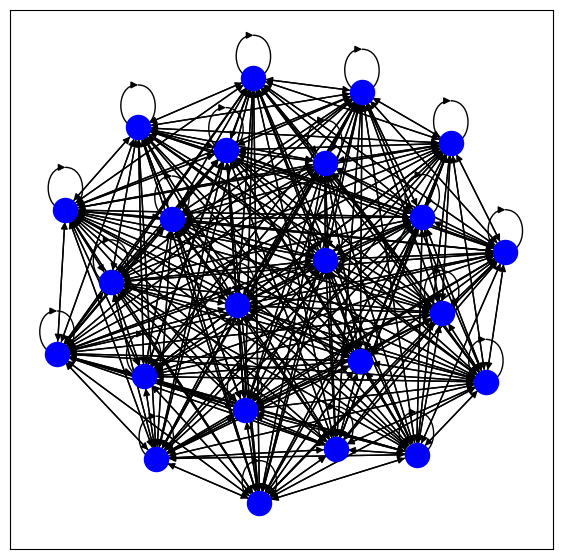

In [6]:
visualize_graph(tr_graphs[0], 'blue')

In [7]:
model.loader = model.get_input(tr_graphs)
model.test_loader = model.get_input(te_graphs)

<u/>**TRAIN**<u/>

_Now we train the model, for the number of epochs specified in the input parameters_

In [8]:
losses = model.train(model.loader)

  0%|▊                                                                                                                                                       | 1/200 [00:38<2:07:03, 38.31s/it]

epoch 0 | loss 0.9180278182029724


  6%|████████▎                                                                                                                                              | 11/200 [07:04<1:59:14, 37.85s/it]

epoch 10 | loss 0.6730422377586365


 10%|███████████████▊                                                                                                                                       | 21/200 [13:29<1:54:13, 38.29s/it]

epoch 20 | loss 0.5166789889335632


 16%|███████████████████████▍                                                                                                                               | 31/200 [19:52<1:47:41, 38.23s/it]

epoch 30 | loss 0.4120045602321625


 20%|██████████████████████████████▉                                                                                                                        | 41/200 [26:17<1:40:57, 38.09s/it]

epoch 40 | loss 0.27508899569511414


 26%|██████████████████████████████████████▌                                                                                                                | 51/200 [32:35<1:33:25, 37.62s/it]

epoch 50 | loss 0.204837366938591


 30%|██████████████████████████████████████████████                                                                                                         | 61/200 [38:53<1:27:40, 37.85s/it]

epoch 60 | loss 0.19445903599262238


 36%|█████████████████████████████████████████████████████▌                                                                                                 | 71/200 [45:15<1:22:46, 38.50s/it]

epoch 70 | loss 0.15713587403297424


 40%|█████████████████████████████████████████████████████████████▏                                                                                         | 81/200 [51:29<1:14:17, 37.46s/it]

epoch 80 | loss 0.17081259191036224


 46%|████████████████████████████████████████████████████████████████████▋                                                                                  | 91/200 [57:42<1:07:35, 37.20s/it]

epoch 90 | loss 0.1566743403673172


 50%|██████████████████████████████████████████████████████████████████████████▋                                                                         | 101/200 [1:03:57<1:01:33, 37.31s/it]

epoch 100 | loss 0.1509363353252411


 56%|███████████████████████████████████████████████████████████████████████████████████▎                                                                  | 111/200 [1:10:12<55:36, 37.49s/it]

epoch 110 | loss 0.12912887334823608


 60%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                           | 121/200 [1:16:29<50:20, 38.23s/it]

epoch 120 | loss 0.12727998197078705


 66%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                                   | 131/200 [1:22:44<43:01, 37.41s/it]

epoch 130 | loss 0.12151172757148743


 70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 141/200 [1:29:02<37:18, 37.95s/it]

epoch 140 | loss 0.10257802903652191


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 151/200 [1:35:18<30:46, 37.69s/it]

epoch 150 | loss 0.10053369402885437


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 161/200 [1:41:34<24:30, 37.71s/it]

epoch 160 | loss 0.0861591249704361


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 171/200 [1:47:49<18:10, 37.60s/it]

epoch 170 | loss 0.07158306241035461


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 181/200 [1:54:05<11:49, 37.34s/it]

epoch 180 | loss 0.0808766707777977


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 191/200 [2:00:15<05:31, 36.80s/it]

epoch 190 | loss 0.08714977651834488


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [2:05:50<00:00, 37.75s/it]


_We can see the internal error decreases with more training_

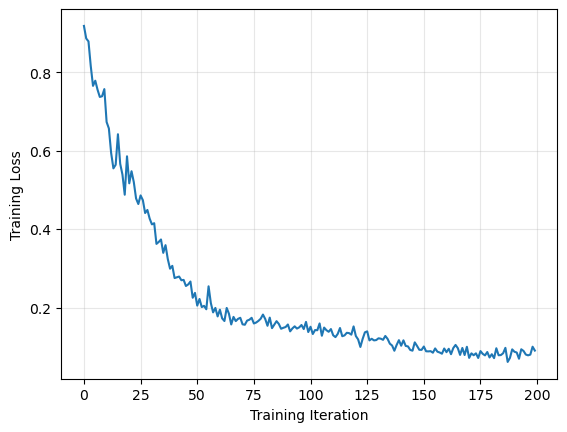

In [10]:
import matplotlib.pyplot as plt

epochs = range(200)
fig = plt.figure()
fig.subplots_adjust()
ax1 = fig.add_subplot()
ax1.set_xlabel('Training Iteration')
ax1.set_ylabel('Training Loss')

plt.grid(alpha=0.3)
ax1.plot(epochs, losses)

<u/>**PREDICT**<u/>

_Now make predictons on an external test set_

In [12]:
predicted_df=model.predict(model.test_loader, te_scl_dict, tr_scl_dict, te_ref_df)
predicted_df

,molecule_name,typestr,normalized_shift,normalized_prediction,shift,predicted_shift
0,TAJSOM,O,0.788296,0.822618,209.557703,225.205301
1,TAJSOM,O,1.048856,0.445572,262.307799,150.858448
2,TAJSOM,O,0.976708,0.511909,247.701502,163.938911
3,TAJSOM,C,-0.546656,-0.276728,72.027695,86.436148
4,TAJSOM,C,0.537629,0.480549,124.445140,124.023423
...,...,...,...,...,...,...
13262,FACZIU,H,-0.909538,-1.112985,1.629443,1.165249
13263,FACZIU,H,-0.971320,-1.054721,1.470193,1.317191
13264,FACZIU,C,-1.496514,-1.244245,26.108858,38.413698
13265,FACZIU,H,-0.919563,-1.029069,1.603601,1.384087


<u/>**EVALUATE**<u/>

_Let's assess how well the model performs on this external testing set, mean absolute error is a good way of evaluating the prediction accuracy of a regression-based model_

In [13]:
def mae(x, y):
    return sum(abs(x-y))/len(x)

In [14]:
h_df=predicted_df[predicted_df['typestr']=='H']
print(f"mean absolute error in PROTON chemical shift prediction: {mae(h_df['predicted_shift'], h_df['shift'])}")
print()
c_df=predicted_df[predicted_df['typestr']=='C']
print(f"mean absolute error in CARBON chemical shift prediction: {mae(c_df['predicted_shift'], c_df['shift'])}")

mean absolute error in PROTON chemical shift prediction: 0.5752206834352181

mean absolute error in CARBON chemical shift prediction: 8.322877762171345


_Changing the hyperparameters will significantly improve these errors at the cost of longer computational times._